<a href="https://colab.research.google.com/github/moushumi-das/DS_project_moushumi/blob/master/Bird_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [3]:
from fastai.vision import *

In [4]:
## project path in my google drive
path_="/content/drive/My Drive/Deep_Learning_project/"

In [15]:
## path for birds folder that contains images 
image_path = '/content/drive/My Drive/Deep_Learning_project/Birds/'

In [16]:
#save fastai path 
p_path = Path(image_path)

In [17]:
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [18]:
# different colums in data
data.classes

['American_robin',
 'Blackbird',
 'CHANNEL-BILLED_CUCKOO',
 'Canary',
 'Magpie',
 'Marsh_warbler',
 'Mourning_Dove',
 'Nightingale',
 'TANAGER',
 'Western_meadowlark']

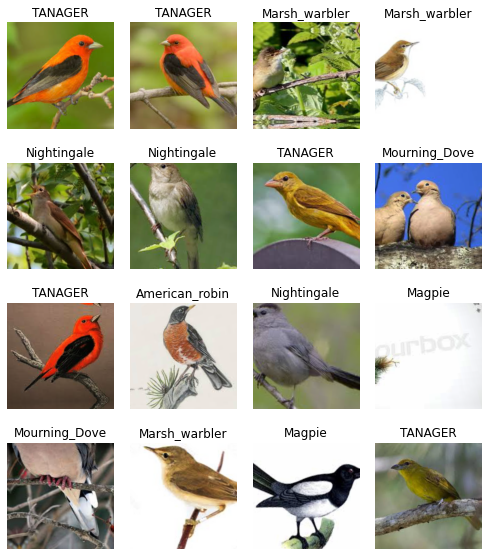

In [21]:
#sample image
data.show_batch(rows=4,figsize=(7,8))

In [22]:
#columns number,len of test and train data
data.c, len(data.train_ds), len(data.valid_ds)

(10, 1614, 403)

In [23]:
#create cnn_learner object
# resnet34 is used for transfer learning 
learn = cnn_learner(data, models.resnet34, metrics=error_rate) #error_rate=1-accuracy rate

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [24]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.312240,0.507717,0.183623,03:43
1,1.229021,0.333548,0.109181,00:20
2,0.775530,0.296289,0.101737,00:20
3,0.560403,0.248362,0.086849,00:19
4,0.420531,0.264349,0.074442,00:19
5,0.336602,0.229785,0.064516,00:19
6,0.265554,0.211075,0.064516,00:19
7,0.213430,0.211639,0.066998,00:19


It can be seen from the output shown above is that error_rate is about 0.07.since error_rate is 1-model accuracy then in this case model accuracy is about 93%. 

In [25]:
# save the model
learn.save('model_1', return_path=True)

PosixPath('/content/drive/My Drive/Deep_Learning_project/Birds/models/model_1.pth')

In [26]:
# In order to train earlier layers the model needs to be unfreezed.
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


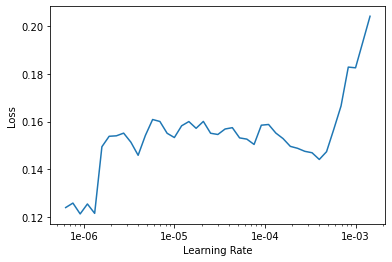

In [31]:
#find optimal learning rates and plotting the graph. Optimal learning rate could help us to improve model accuracy.
learn.lr_find()
learn.recorder.plot()

In [32]:

# fit whole model with new learning rates 
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3), wd=.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.143725,0.216766,0.071960,00:19
1,0.139546,0.211979,0.071960,00:19


In [33]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


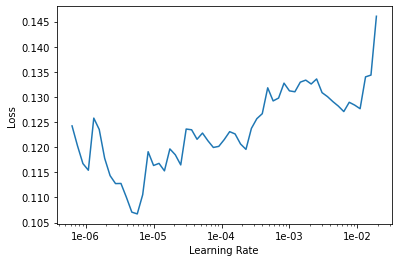

In [34]:
learn.lr_find()
learn.recorder.plot()

In [35]:
learn.save('model_2')

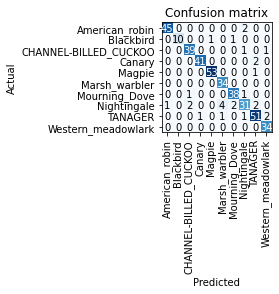

In [58]:
learn.load('model_1')
interp = ClassificationInterpretation.from_learner(learn)
#plot results of model_1 on validation set 
interp.plot_confusion_matrix()

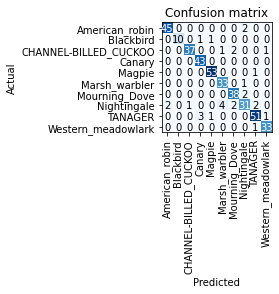

In [57]:
learn.load('model_2')
interp_2 = ClassificationInterpretation.from_learner(learn)
#plot results of model_2 on validation set 
interp_2.plot_confusion_matrix()

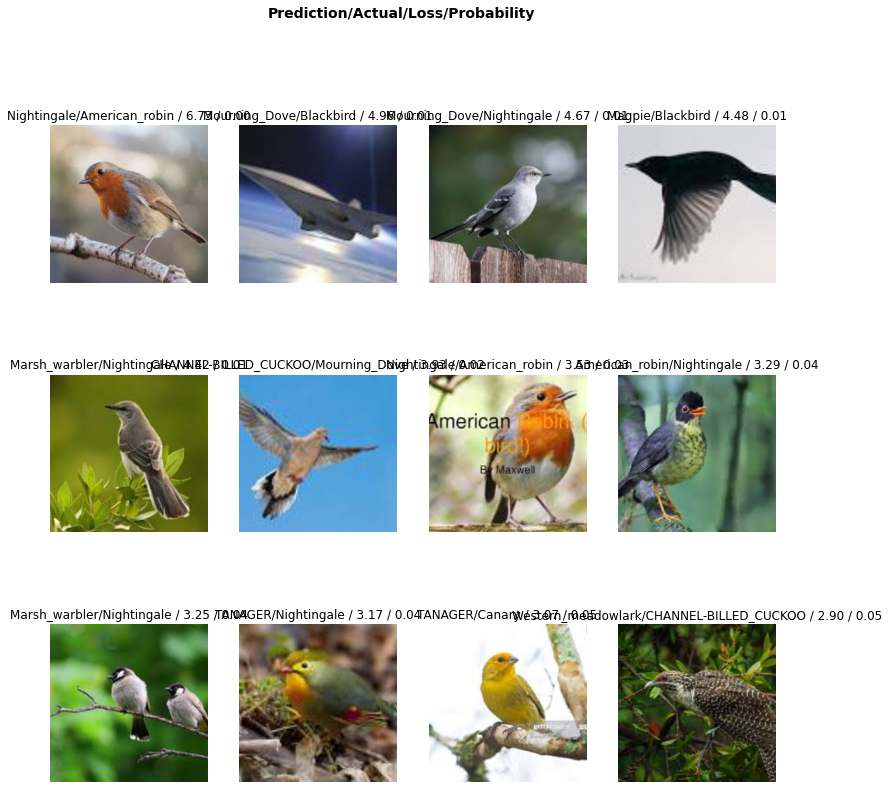

In [43]:
# plot top losses (most wrong) images
interp.plot_top_losses(12, figsize=(13,13))

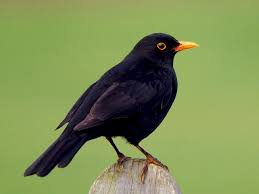

In [59]:
img_black_bird= open_image(Path(path_)/'Bird_image'/'black_bird.jpg')
img_black_bird

In [46]:
#testing the model prediction
pred_class,pred_idx,outputs = learn.predict(img_black_bird)
print(pred_class)

Blackbird


Predicted sample image successfully.

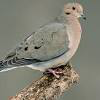

In [47]:
img_mourning_dove= open_image(Path(path_)/'Bird_image'/'mourning_dove.jpg')
img_mourning_dove

In [48]:
pred_class,pred_idx,outputs = learn.predict(img_mourning_dove)
print(pred_class)

Mourning_Dove


Predicted sample image successfully.

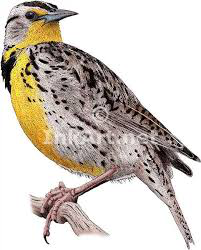

In [49]:
img_western_meadowlark= open_image(Path(path_)/'Bird_image'/'western_meadowlark.jpg')
img_western_meadowlark

In [50]:
pred_class,pred_idx,outputs = learn.predict(img_western_meadowlark)
print(pred_class)

Western_meadowlark


Predicted sample image successfully.

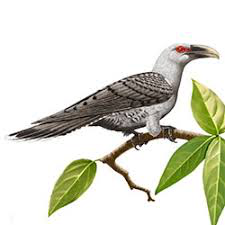

In [51]:
img_house_sparrow= open_image(Path(path_)/'Bird_image'/'house_sparrow.jpg')
img_house_sparrow

In [52]:
pred_class,pred_idx,outputs = learn.predict(img_house_sparrow)
print(pred_class)

CHANNEL-BILLED_CUCKOO


In this case prediction goes wrong since model predict the sample as Channel-billed-cuckoo instead of house_sparrow.


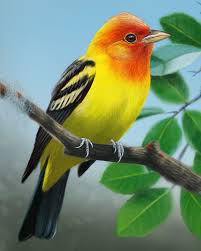

In [53]:
img_tanager= open_image(Path(path_)/'Bird_image'/'tanager.jpg')
img_tanager

In [54]:
pred_class,pred_idx,outputs = learn.predict(img_tanager)
print(pred_class)

TANAGER


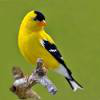

In [55]:
img_canary= open_image(Path(path_)/'Bird_image'/'canary.jpg')
img_canary

In [56]:
pred_class,pred_idx,outputs = learn.predict(img_canary)
print(pred_class)

Canary


In [ ]:
img_magpie= open_image(Path(path_)/'Bird_image'/'magpie.jpg')
img_magpie

In [ ]:
img_marsh_warlber= open_image(Path(path_)/'Bird_image'/'marsh_warbler.jpg')
img_marsh_warlber

In [ ]:
img_american_robin= open_image(Path(path_)/'Bird_image'/'american_robin.jpg')
img_american_robin

In [ ]:
img_nightingale= open_image(Path(path_)/'Bird_image'/'Nightingale.jpg')
img_nightingale

In [ ]:


pred_class,pred_idx,outputs = learn.predict(img_magpie)
print(pred_class)
pred_class,pred_idx,outputs = learn.predict(img_marsh_warlber)
print(pred_class)
pred_class,pred_idx,outputs = learn.predict(img_american_robin)
print(pred_class)
pred_class,pred_idx,outputs = learn.predict(img_nightingale)
print(pred_class)




